# Subjective
WomenTechWomenYes (WTWY) has an annual gala at the beginning of the summer each year. As we are new and inclusive organization, we try to do double duty with the gala both to fill our event space with individuals passionate about increasing the participation of women in technology, and to concurrently build awareness and reach.

In [1]:
#setup import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# this statement allows the visuals to render within your Jupyter Notebook, instead of a pop window
%matplotlib inline 

# various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.precision', 3)

In [2]:
def import_file(File_Path, Local=False):
    """
    import file into DataFrame and strip leading and tailing 
    whitespaces if any.
    File_path: internet link(URL) or where file is stored
    Local: is it URL or File stored in local?, Defualt True(store in local)
    """
    import pandas as pd
    
    if Local:
        fh = open(File_Path)
    else:
        
        from urllib.request import urlopen  # the lib that handles the url stuff
        fh = urlopen(File_Path) # it's a file like object and works just like a file
        
    data = pd.read_csv(fh, header = 0) #import file as DataFrame
    
    fh.close()
        
    return data

In [3]:
#import_file('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190921.txt', False)
DF_19021 = import_file('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190921.txt')
DF_19021.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,00:00:00,REGULAR,7198818,2438323
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,04:00:00,REGULAR,7198834,2438325
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,08:00:00,REGULAR,7198847,2438354
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,12:00:00,REGULAR,7198929,2438428
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,16:00:00,REGULAR,7199125,2438483


In [4]:
cur_files = [
  "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190504.txt",
  "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190511.txt",
  "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190518.txt",
  "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190525.txt",
  "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190601.txt",
  "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190608.txt",
  "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190615.txt",
  "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190622.txt",
  "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190629.txt",
]

In [5]:
data_list = []

for cur_file in cur_files:
    print(".")
    data_list.append(pd.read_csv(cur_file))
    
df = pd.concat(data_list)
df.rename(columns=lambda x: x.strip(), inplace=True)

.
.
.
.
.
.
.
.
.


In [6]:
DF_19021 = df

In [7]:
DF_19021.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [8]:
# Remove whitesapce for the columns name 
DF_19021.rename(columns=lambda x: x.strip(), inplace=True)

DF_19021.sort_values(["STATION","SCP","DATE","TIME"], inplace=True)
#df = DF_19021.groupby(["STATION", "SCP"])

#Calculate ENTRIES and EXITS DIfference to get passenger number entering/exiting turnstile
DF_19021['ENTRIES_DIFF'] = DF_19021.groupby(["STATION", "SCP"])['ENTRIES'].diff()
DF_19021['EXITS_DIFF'] = DF_19021.groupby(["STATION", "SCP"])['EXITS'].diff()


# DF_19021['ENTRIES_DIFF'] = df['ENTRIES'].diff()
# DF_19021['EXITS_DIFF'] = df['EXITS'].diff()
# df['EXITS_DIFF'] = df['EXITS'].diff()

In [9]:
# (DF_19021.groupby()
#          .diff()
#         .sort_values()
#      .rest_index())

TypeError: You have to supply one of 'by' and 'level'

In [10]:
DF_19021.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENTRIES_DIFF,EXITS_DIFF
31049,H007,R248,00-00-00,1 AV,L,BMT,04/27/2019,00:00:00,REGULAR,14647394,16373694,NaN,NaN
31050,H007,R248,00-00-00,1 AV,L,BMT,04/27/2019,04:00:00,REGULAR,14647394,16373709,0.0,15.0
31051,H007,R248,00-00-00,1 AV,L,BMT,04/27/2019,08:00:00,REGULAR,14647395,16373732,1.0,23.0
31052,H007,R248,00-00-00,1 AV,L,BMT,04/27/2019,12:00:00,REGULAR,14647395,16373766,0.0,34.0
31053,H007,R248,00-00-00,1 AV,L,BMT,04/27/2019,16:00:00,REGULAR,14647395,16373800,0.0,34.0
31054,H007,R248,00-00-00,1 AV,L,BMT,04/27/2019,20:00:00,REGULAR,14647395,16373826,0.0,26.0
31055,H007,R248,00-00-00,1 AV,L,BMT,04/28/2019,00:00:00,REGULAR,14647395,16373849,0.0,23.0
31056,H007,R248,00-00-00,1 AV,L,BMT,04/28/2019,04:00:00,REGULAR,14647395,16373865,0.0,16.0
31057,H007,R248,00-00-00,1 AV,L,BMT,04/28/2019,08:00:00,REGULAR,14647395,16373883,0.0,18.0
31058,H007,R248,00-00-00,1 AV,L,BMT,04/28/2019,12:00:00,REGULAR,14647395,16373909,0.0,26.0


In [38]:
DF_19021[DF_19021.TIME=='08:53:46']

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENTRIES_DIFF,EXITS_DIFF
167508,R253,R181,00-00-00,110 ST,6,IRT,06/15/2019,08:53:46,REGULAR,4698414,7543264,3.0,4.0
167556,R253,R181,00-00-01,110 ST,6,IRT,06/15/2019,08:53:46,REGULAR,5440993,8555596,1.0,3.0
167604,R253,R181,00-00-02,110 ST,6,IRT,06/15/2019,08:53:46,REGULAR,5480327,12595521,2.0,1.0


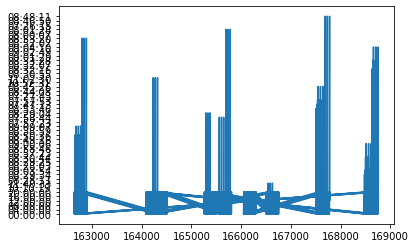

In [47]:
plt.plot(DF_19021[DF_19021.STATION=='110 ST'].TIME)

In [11]:
DF_19021.describe()

,ENTRIES,EXITS,ENTRIES_DIFF,EXITS_DIFF
count,1.850e+06,1.850e+06,1.846e+06,1.846e+06
mean,4.176e+07,3.417e+07,2.508e+03,7.398e+02
std,2.125e+08,1.956e+08,1.680e+08,1.542e+08
min,0.000e+00,0.000e+00,-2.128e+09,-2.062e+09
25%,3.266e+05,1.302e+05,1.000e+00,1.000e+00
50%,2.156e+06,1.233e+06,6.200e+01,4.600e+01
75%,6.779e+06,4.599e+06,2.900e+02,2.080e+02
max,2.129e+09,2.124e+09,2.128e+09,2.062e+09


In [12]:
x =DF_19021.count()
y = DF_19021[(DF_19021.EXITS_DIFF < 0) | (DF_19021.ENTRIES_DIFF < 0)].count()
x / y

C/A             7.741
UNIT            7.741
SCP             7.741
STATION         7.741
LINENAME        7.741
DIVISION        7.741
DATE            7.741
TIME            7.741
DESC            7.741
ENTRIES         7.741
EXITS           7.741
ENTRIES_DIFF    7.723
EXITS_DIFF      7.723
dtype: float64

In [13]:
#Clean data, remove negative number and numbers larger than 40000
DF_cleaned = DF_19021[(DF_19021.EXITS_DIFF >= 0) & (DF_19021.ENTRIES_DIFF >= 0)]
DF_cleaned = DF_cleaned[(DF_cleaned.EXITS_DIFF <= 4e4) & (DF_cleaned.ENTRIES_DIFF <= 4e4)]


In [14]:
DF_cleaned[DF_cleaned.STATION=='14 ST-UNION SQ'].SCP.count()

15301

In [15]:
# Create new Colum for (Entries_DIFF + EXITS_DIFF)
DF_cleaned['Total_flows'] = DF_cleaned.ENTRIES_DIFF+ DF_cleaned.EXITS_DIFF
DF_cleaned.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENTRIES_DIFF,EXITS_DIFF,Total_flows
31050,H007,R248,00-00-00,1 AV,L,BMT,04/27/2019,04:00:00,REGULAR,14647394,16373709,0.0,15.0,15.0
31051,H007,R248,00-00-00,1 AV,L,BMT,04/27/2019,08:00:00,REGULAR,14647395,16373732,1.0,23.0,24.0
31052,H007,R248,00-00-00,1 AV,L,BMT,04/27/2019,12:00:00,REGULAR,14647395,16373766,0.0,34.0,34.0
31053,H007,R248,00-00-00,1 AV,L,BMT,04/27/2019,16:00:00,REGULAR,14647395,16373800,0.0,34.0,34.0
31054,H007,R248,00-00-00,1 AV,L,BMT,04/27/2019,20:00:00,REGULAR,14647395,16373826,0.0,26.0,26.0


In [16]:
DF_19021.count()

C/A             1850169
UNIT            1850169
SCP             1850169
STATION         1850169
LINENAME        1850169
DIVISION        1850169
DATE            1850169
TIME            1850169
DESC            1850169
ENTRIES         1850169
EXITS           1850169
ENTRIES_DIFF    1845843
EXITS_DIFF      1845843
dtype: int64

In [17]:
DF_cleaned.count()

C/A             1459493
UNIT            1459493
SCP             1459493
STATION         1459493
LINENAME        1459493
DIVISION        1459493
DATE            1459493
TIME            1459493
DESC            1459493
ENTRIES         1459493
EXITS           1459493
ENTRIES_DIFF    1459493
EXITS_DIFF      1459493
Total_flows     1459493
dtype: int64

In [ ]:
#DF_cleaned[DF_cleaned.STATION == '1 AV'].groupby(['STATION','DATE','TIME']).sum()


In [18]:
# Convert Date to day of week 
DF_cleaned['DATE'] = pd.to_datetime(DF_cleaned['DATE'])
DF_cleaned['day_of_week'] = DF_cleaned['DATE'].dt.day_name()

DF_cleaned.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENTRIES_DIFF,EXITS_DIFF,Total_flows,day_of_week
31050,H007,R248,00-00-00,1 AV,L,BMT,2019-04-27,04:00:00,REGULAR,14647394,16373709,0.0,15.0,15.0,Saturday
31051,H007,R248,00-00-00,1 AV,L,BMT,2019-04-27,08:00:00,REGULAR,14647395,16373732,1.0,23.0,24.0,Saturday
31052,H007,R248,00-00-00,1 AV,L,BMT,2019-04-27,12:00:00,REGULAR,14647395,16373766,0.0,34.0,34.0,Saturday
31053,H007,R248,00-00-00,1 AV,L,BMT,2019-04-27,16:00:00,REGULAR,14647395,16373800,0.0,34.0,34.0,Saturday
31054,H007,R248,00-00-00,1 AV,L,BMT,2019-04-27,20:00:00,REGULAR,14647395,16373826,0.0,26.0,26.0,Saturday


In [19]:
# Seperate weekdays and weekend DF
def IsWeekday(string):
    weekday = ['Monday','Tuesday','Wednesday','Thursday','Friday']
    if string in weekday:
        return "True"
    else:
        return "False"

DF_cleaned['Weekday'] = DF_cleaned.day_of_week.apply(lambda x: IsWeekday(x))


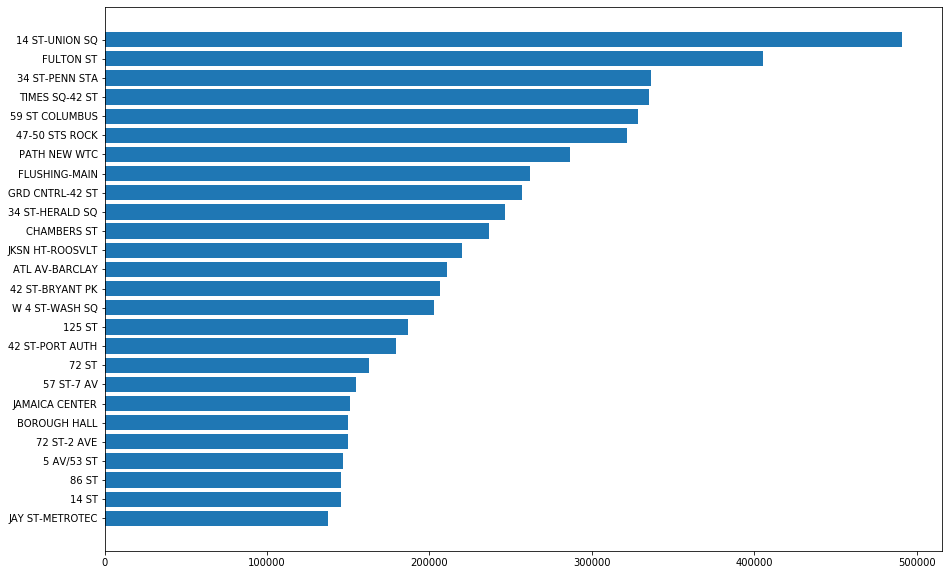

In [67]:
# Seperate weekdays and weekend DF
def BIN_time(string):
    import datetime as DT
    cur_hour = DT.datetime.strptime(string, '%H:%M:%S').hour
    
    if cur_hour < 2:
      cur_hour = 0
    elif cur_hour < 6:
      cur_hour = 4
    elif cur_hour < 10:
      cur_hour = 8
    elif cur_hour < 14:
      cur_hour = 12
    elif cur_hour < 18:
      cur_hour = 16
    elif cur_hour < 22:
      cur_hour = 20
    else:
      assert cur_hour < 24
      cur_hour = 0
    return cur_hour

# DF_cleaned.TIME.apply(lambda x: BIN_time(x))
DF_cleaned['NEW_TIME'] = DF_cleaned.TIME.apply(lambda x: BIN_time(x))


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENTRIES_DIFF,EXITS_DIFF,Total_flows,day_of_week,Weekday,NEW_TIME
31050,H007,R248,00-00-00,1 AV,L,BMT,2019-04-27,04:00:00,REGULAR,14647394,16373709,0.0,15.0,15.0,Saturday,False,4
31051,H007,R248,00-00-00,1 AV,L,BMT,2019-04-27,08:00:00,REGULAR,14647395,16373732,1.0,23.0,24.0,Saturday,False,8
31052,H007,R248,00-00-00,1 AV,L,BMT,2019-04-27,12:00:00,REGULAR,14647395,16373766,0.0,34.0,34.0,Saturday,False,12
31053,H007,R248,00-00-00,1 AV,L,BMT,2019-04-27,16:00:00,REGULAR,14647395,16373800,0.0,34.0,34.0,Saturday,False,16
31054,H007,R248,00-00-00,1 AV,L,BMT,2019-04-27,20:00:00,REGULAR,14647395,16373826,0.0,26.0,26.0,Saturday,False,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181202,R419,R326,00-05-01,ZEREGA AV,6,IRT,2019-06-28,05:00:00,REGULAR,39,151,0.0,0.0,0.0,Friday,True,4
181203,R419,R326,00-05-01,ZEREGA AV,6,IRT,2019-06-28,09:00:00,REGULAR,39,151,0.0,0.0,0.0,Friday,True,8
181204,R419,R326,00-05-01,ZEREGA AV,6,IRT,2019-06-28,13:00:00,REGULAR,39,151,0.0,0.0,0.0,Friday,True,12
181205,R419,R326,00-05-01,ZEREGA AV,6,IRT,2019-06-28,17:00:00,REGULAR,39,151,0.0,0.0,0.0,Friday,True,16


In [69]:
DF_cleaned.NEW_TIME.unique()

array([ 4,  8, 12, 16, 20,  0])

In [78]:
# pick NEW_TIME 12 and 20 
DF_cleaned[ ( DF_cleaned.NEW_TIME == 12 ) | ( DF_cleaned.NEW_TIME == 20 ) ]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENTRIES_DIFF,EXITS_DIFF,Total_flows,day_of_week,Weekday,NEW_TIME
31052,H007,R248,00-00-00,1 AV,L,BMT,2019-04-27,12:00:00,REGULAR,14647395,16373766,0.0,34.0,34.0,Saturday,False,12
31054,H007,R248,00-00-00,1 AV,L,BMT,2019-04-27,20:00:00,REGULAR,14647395,16373826,0.0,26.0,26.0,Saturday,False,20
31058,H007,R248,00-00-00,1 AV,L,BMT,2019-04-28,12:00:00,REGULAR,14647395,16373909,0.0,26.0,26.0,Sunday,False,12
31060,H007,R248,00-00-00,1 AV,L,BMT,2019-04-28,20:00:00,REGULAR,14647395,16373964,0.0,28.0,28.0,Sunday,False,20
31065,H007,R248,00-00-00,1 AV,L,BMT,2019-04-29,12:00:00,REGULAR,14648785,16375867,873.0,832.0,1705.0,Monday,True,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181194,R419,R326,00-05-01,ZEREGA AV,6,IRT,2019-06-26,21:00:00,REGULAR,39,151,0.0,0.0,0.0,Wednesday,True,20
181198,R419,R326,00-05-01,ZEREGA AV,6,IRT,2019-06-27,13:00:00,REGULAR,39,151,0.0,0.0,0.0,Thursday,True,12
181200,R419,R326,00-05-01,ZEREGA AV,6,IRT,2019-06-27,21:00:00,REGULAR,39,151,0.0,0.0,0.0,Thursday,True,20
181204,R419,R326,00-05-01,ZEREGA AV,6,IRT,2019-06-28,13:00:00,REGULAR,39,151,0.0,0.0,0.0,Friday,True,12


In [132]:

DF_weekdays = DF_cleaned[DF_cleaned.Weekday == "True"]
DF_weekend = DF_cleaned[DF_cleaned.Weekday == "False"]


# narrow down to top 25
TOP_25_DF_weekend = DF_weekend.groupby(['STATION']).sum().sort_values('Total_flows', ascending=False).reset_index().iloc[0:26]
TOP_25_DF_weekedays = DF_weekdays.groupby(['STATION']).sum().sort_values('Total_flows', ascending=False).reset_index().iloc[0:26]


TOP_25_DF_weekedays['Daily_Avg'] = TOP_25_DF_weekedays.Total_flows/45

TOP_25_DF_weekedays['Entries_Daily_Avg'] = TOP_25_DF_weekedays.ENTRIES_DIFF/45
TOP_25_DF_weekedays['Exits_Daily_Avg'] = TOP_25_DF_weekedays.EXITS_DIFF/45

TOP_25_DF_weekend['Daily_Avg'] = TOP_25_DF_weekend.Total_flows/18

TOP_25_DF_weekend['Entries_Daily_Avg'] = TOP_25_DF_weekend.ENTRIES_DIFF/18
TOP_25_DF_weekend['Exits_Daily_Avg'] = TOP_25_DF_weekend.EXITS_DIFF/18

Text(0.5, 1.0, 'weekdays')

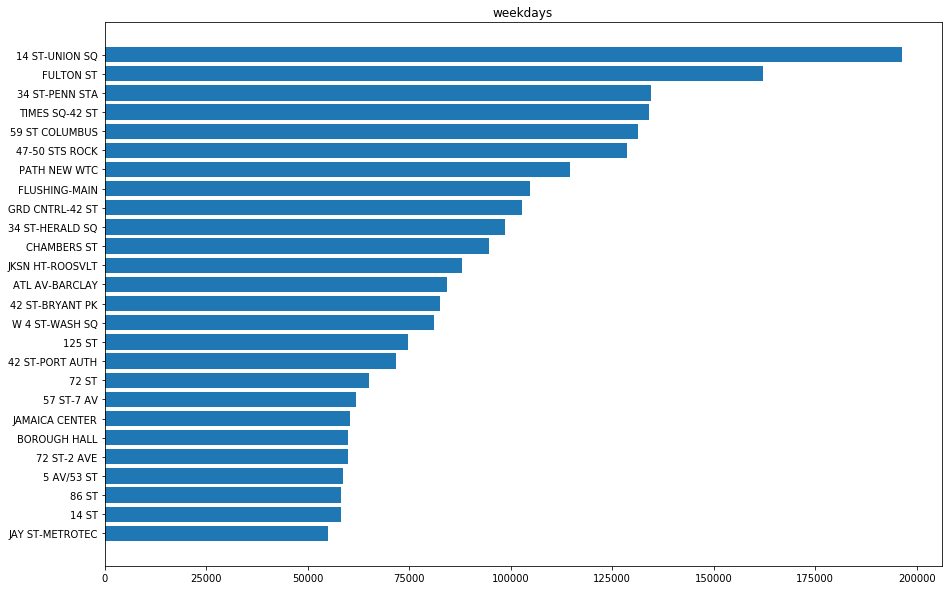

In [133]:

# plot
plt.figure(figsize = [15,10])
plt.barh(TOP_25_DF_weekedays.STATION,TOP_25_DF_weekedays.Daily_Avg ); #horizontal bar chart
plt.gca().invert_yaxis()
plt.title("weekdays")

Text(0.5, 1.0, 'weekends')

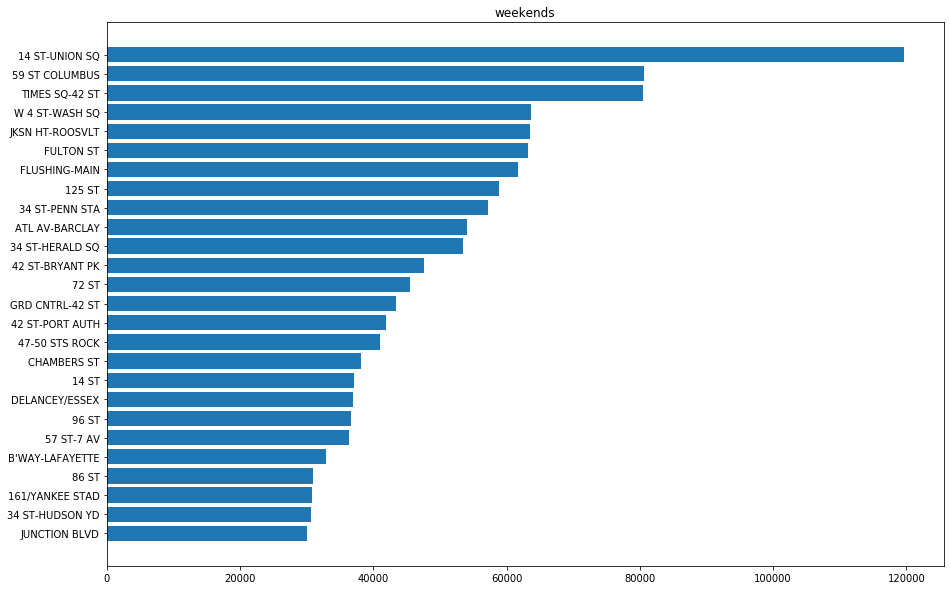

In [134]:

# plot
plt.figure(figsize = [15,10])
plt.barh(TOP_25_DF_weekend.STATION,TOP_25_DF_weekend.Daily_Avg ); #horizontal bar chart
plt.gca().invert_yaxis()
plt.title("weekends")

In [153]:

DF_morning = DF_weekdays[DF_weekdays.NEW_TIME == 12]
DF_night = DF_weekdays[DF_weekdays.NEW_TIME == 20]


# narrow down to top 25
TOP_25_DF_morning = DF_morning.groupby(['STATION']).sum().sort_values('EXITS_DIFF', ascending=False).reset_index().iloc[0:26]
TOP_25_DF_night = DF_night.groupby(['STATION']).sum().sort_values('ENTRIES_DIFF', ascending=False).reset_index().iloc[0:26]


TOP_25_DF_night['Daily_Avg'] = TOP_25_DF_night.Total_flows/45

TOP_25_DF_night['Entries_Daily_Avg'] = TOP_25_DF_night.ENTRIES_DIFF/45
TOP_25_DF_night['Exits_Daily_Avg'] = TOP_25_DF_night.EXITS_DIFF/45

TOP_25_DF_morning['Daily_Avg'] = TOP_25_DF_morning.Total_flows/18

TOP_25_DF_morning['Entries_Daily_Avg'] = TOP_25_DF_morning.ENTRIES_DIFF/18
TOP_25_DF_morning['Exits_Daily_Avg'] = TOP_25_DF_morning.EXITS_DIFF/18


TOP_25_DF_morning['Flow_Ratio'] = TOP_25_DF_morning.ENTRIES_DIFF/TOP_25_DF_morning.EXITS_DIFF

TOP_25_DF_morning['Flow_Ratio']=TOP_25_DF_morning['Flow_Ratio'].replace(0, np.nan)
TOP_25_DF_morning['Flow_Ratio']=TOP_25_DF_morning['Flow_Ratio'].replace(np.inf, np.nan)
TOP_25_DF_morning['Flow_Ratio'] = TOP_25_DF_morning['Flow_Ratio'].fillna(value=1)


TOP_25_DF_night['Flow_Ratio'] = TOP_25_DF_night.ENTRIES_DIFF/TOP_25_DF_night.EXITS_DIFF

TOP_25_DF_night['Flow_Ratio']=TOP_25_DF_night['Flow_Ratio'].replace(0, np.nan)
TOP_25_DF_night['Flow_Ratio']=TOP_25_DF_night['Flow_Ratio'].replace(np.inf, np.nan)
TOP_25_DF_night['Flow_Ratio'] = TOP_25_DF_night['Flow_Ratio'].fillna(value=1)


In [161]:
TOP_25_DF_night.describe()

,ENTRIES,EXITS,ENTRIES_DIFF,EXITS_DIFF,Total_flows,NEW_TIME,Flow_Ratio,Daily_Avg,Entries_Daily_Avg,Exits_Daily_Avg
count,2.600e+01,2.600e+01,2.600e+01,2.600e+01,2.600e+01,26.000,26.000,26.000,26.000,26.000
mean,5.278e+10,4.386e+10,8.850e+05,4.113e+05,1.296e+06,26717.692,2.770,28805.811,19666.841,9138.970
std,5.132e+10,5.158e+10,4.268e+05,2.844e+05,5.762e+05,11371.534,1.383,12803.981,9485.276,6319.521
min,1.486e+08,1.664e+08,4.878e+05,9.462e+04,6.134e+05,11700.000,0.592,13631.778,10841.044,2102.556
25%,5.757e+09,4.648e+09,5.246e+05,2.328e+05,8.228e+05,18285.000,1.932,18283.961,11657.556,5173.322
50%,3.736e+10,1.511e+10,6.480e+05,3.053e+05,1.204e+06,24010.000,2.716,26744.833,14399.889,6783.722
75%,8.310e+10,8.313e+10,1.230e+06,5.219e+05,1.689e+06,35090.000,3.597,37542.322,27332.267,11597.711
max,1.526e+11,1.724e+11,1.705e+06,1.241e+06,2.688e+06,60900.000,5.483,59739.400,37896.178,27567.267


Text(0.5, 1.0, 'mornings')

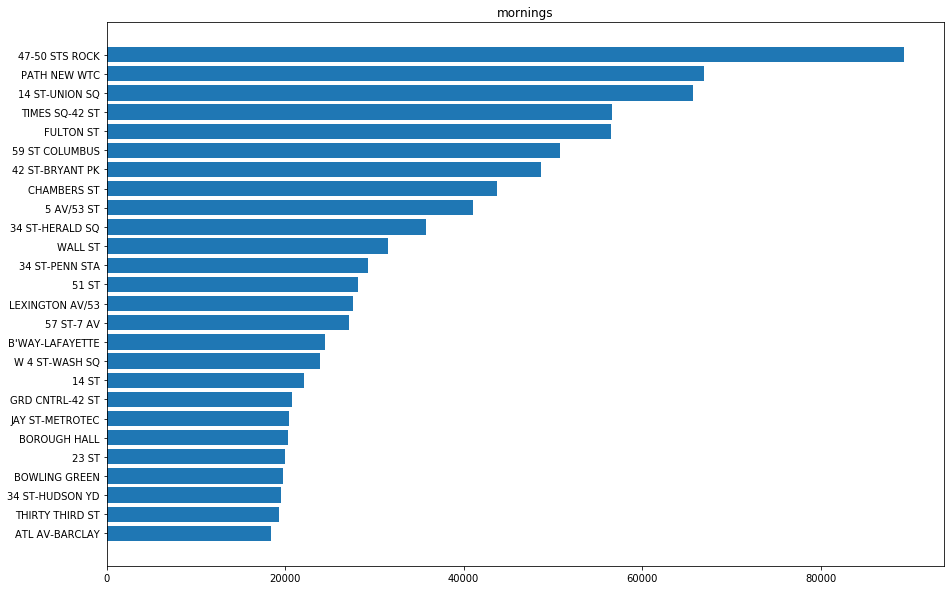

In [154]:

# plot
plt.figure(figsize = [15,10])
plt.barh(TOP_25_DF_morning.STATION,TOP_25_DF_morning.Exits_Daily_Avg ); #horizontal bar chart
plt.gca().invert_yaxis()
plt.title("mornings")

Text(0.5, 1.0, 'nights')

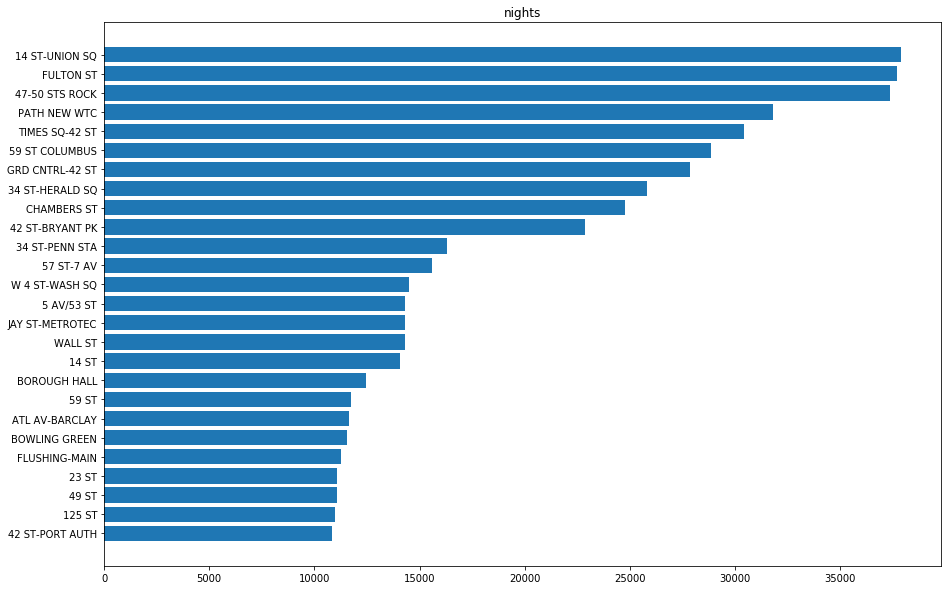

In [155]:

# plot
plt.figure(figsize = [15,10])
plt.barh(TOP_25_DF_night.STATION,TOP_25_DF_night.Entries_Daily_Avg ); #horizontal bar chart
plt.gca().invert_yaxis()
plt.title("nights")

Text(0.5, 1.0, 'mornings')

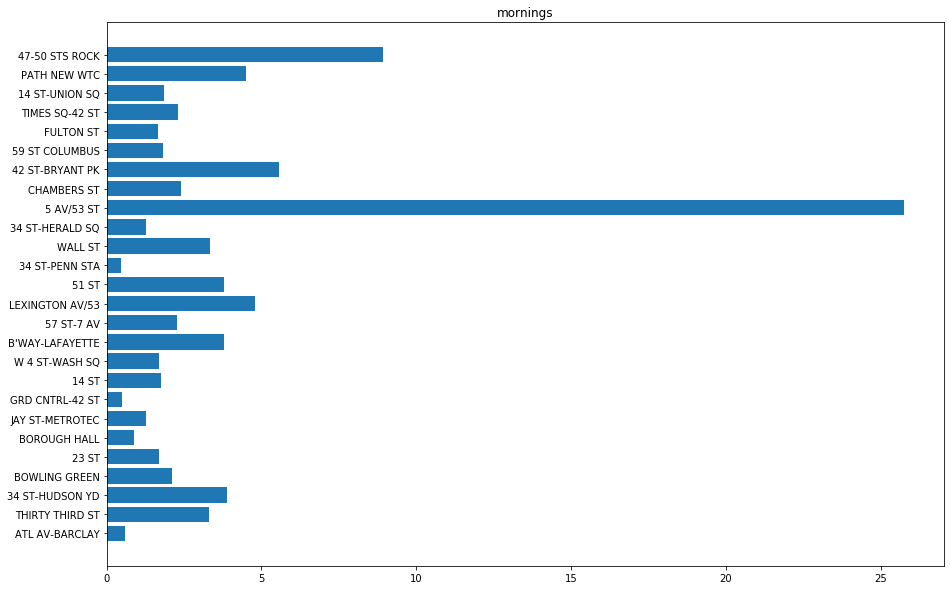

In [156]:

# plot
plt.figure(figsize = [15,10])
plt.barh(TOP_25_DF_morning.STATION,1/TOP_25_DF_morning.Flow_Ratio ); #horizontal bar chart
plt.gca().invert_yaxis()
plt.title("mornings")

Text(0.5, 1.0, 'nights')

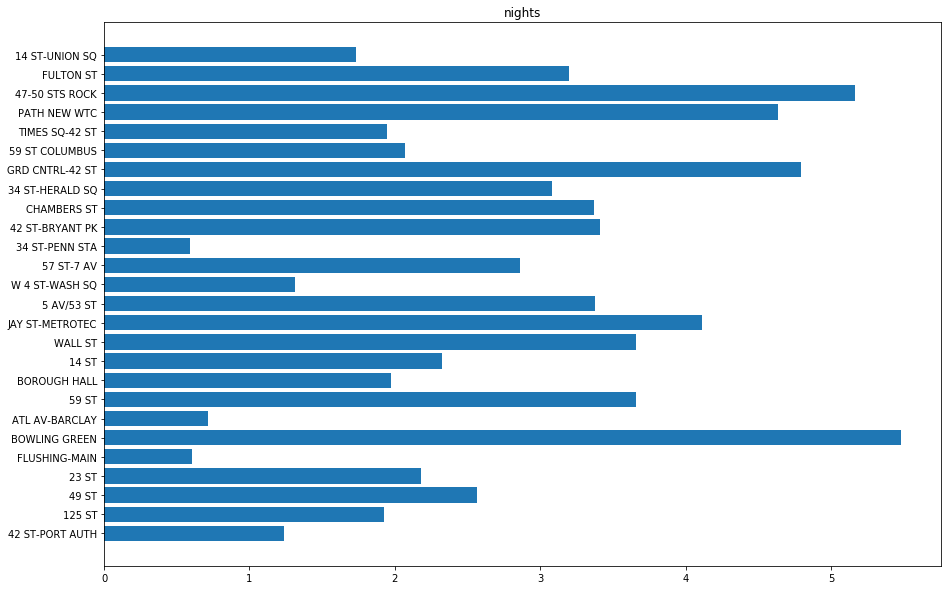

In [157]:

# plot
plt.figure(figsize = [15,10])
plt.barh(TOP_25_DF_night.STATION,TOP_25_DF_night.Flow_Ratio ); #horizontal bar chart
plt.gca().invert_yaxis()
plt.title("nights")

In [140]:
TOP_25_DF_weekedays.head(10)

,STATION,ENTRIES,EXITS,ENTRIES_DIFF,EXITS_DIFF,Total_flows,NEW_TIME,Flow_Ratio,Daily_Avg,Entries_Daily_Avg,Exits_Daily_Avg
0,14 ST-UNION SQ,193381105656,101638579250,4.595e+06,4.239e+06,8.834e+06,110432,26084.217,196314.800,102118.867,94195.933
1,FULTON ST,913036329012,1101285684121,4.355e+06,2.945e+06,7.300e+06,192420,81117.001,162230.956,96785.156,65445.800
2,34 ST-PENN STA,947343219466,741199778243,3.159e+06,2.897e+06,6.055e+06,118336,40020.491,134564.644,70189.778,64374.867
3,TIMES SQ-42 ST,653952260617,779490724934,3.215e+06,2.815e+06,6.031e+06,103752,29052.102,134020.200,71454.956,62565.244
4,59 ST COLUMBUS,921923081599,808538008588,3.242e+06,2.665e+06,5.908e+06,111264,27648.852,131282.533,72054.200,59228.333
5,47-50 STS ROCK,640816330970,640050327046,2.825e+06,2.964e+06,5.789e+06,99060,34831.253,128650.311,62786.800,65863.511
6,PATH NEW WTC,881017922,986667075,2.680e+06,2.480e+06,5.159e+06,110256,40181.139,114652.733,59549.867,55102.867
7,FLUSHING-MAIN,59852978910,57279450371,2.585e+06,2.129e+06,4.714e+06,81656,13791.849,104758.267,57450.022,47308.244
8,GRD CNTRL-42 ST,272641835142,224260334180,3.459e+06,1.173e+06,4.631e+06,61472,81803.569,102918.311,76855.889,26062.422
9,34 ST-HERALD SQ,519505504048,455470147395,2.759e+06,1.676e+06,4.434e+06,73584,25834.916,98536.267,61302.778,37233.489
